# Exploratory analysis 

The propose of this notebook is to dig deeper into the dataset. There are more than 300 million
transactions provided that were sampled into a 3 million dataset to be evaluated before getting to the full data.

The preprocessing script to create this sample is in the root folder of this project and is divided into two parts:
   
   - **data-cleaner:** responsible for removing unecessary columns and converting the csv files to `utf-8` encoding.
   - **data-sampler:** responsible for splitting the data into samaller sets and collecting 15 out of each 100 records.

These plots and insights will be used to provide a better undestanding of the overall data and its complexity in order to create processes and valuable techniques to better fit the problem.

## Loading data

The data were exported in a naive way. This leads to difficulties into loading the types correctly by `pandas`. In orther to fix this, we have to load the dataset, and manually parse numeric columns to the right type. This is a simpler approach than trying to fix each of the 3 million rows of the csv file, but encreases the load type by almost a half.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

data = pd.read_csv('./sample.csv', delimiter=';',index_col='NU_AUTORIZACAO', low_memory=False)
data.sample(n=10)

/Users/macbook-pro/.virtualenvs/capstone/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,CO_UF_FARMACIA,DT_VENDA,HS_VENDA,DT_EMISSAO_RECEITA,CO_MUNICIPIO_IBGE_FARMACIA,SG_UF_CRF,SG_UF_CRM,CO_CPF,CO_PRESCRITOR,CO_CRF,...,QT_AUTORIZADA,QT_DEVOLVIDA,QT_SOLICITADA,VL_PRECO_SUBSIDIADO,VL_PRECO_VENDA,CO_CO_CODIGO_BARRA,CO_NO_FABRICANTE,CO_CO_PRINCIPIO_ATIVO,CO_CO_PATOLOGIA,CO_SOLICITACAO
NU_AUTORIZACAO,,,,,,,,,,,,,,,,,,,,,
998468180183123,RS,2014-02-26,1904,2014-02-24,431490,RS,RS,19113937,860093,13072,...,60,NaN,60.0,53.46,45.43,276,84,56,3,343268674
998468921178040,AL,2019-05-18,1205,2018-12-11,270430,AL,AL,19849013,667258,35509,...,30,NaN,30.0,5.40,5.40,247,84,51,1,1115979458
998468662023943,TO,2017-08-17,909,2017-07-04,172065,TO,TO,4172252,677708,37079,...,30,NaN,30.0,9.00,9.00,861,38,10,1,847544635
998468743333452,SP,2018-03-05,842,2017-10-06,354220,SP,SP,31858137,1123837,36751,...,60,NaN,60.0,3.60,1.80,1839,252,26,1,931587884
998468322637119,RS,2015-04-22,1418,2015-03-23,430510,RS,RS,37666345,862656,2541,...,30,NaN,30.0,2.40,2.40,293,84,44,1,493712152
998468816754681,RN,2018-08-29,833,2018-03-13,240810,RN,RN,34450713,913789,22776,...,60,NaN,60.0,9.60,4.80,1383,252,4,2,1007716924
998468430515638,SP,2016-02-02,1133,2015-11-24,352250,SP,SP,23857631,1081028,15600,...,30,NaN,30.0,9.60,9.60,677,204,10,1,606645916
998468391535988,SP,2015-10-20,1234,2015-10-20,352570,SP,SP,40229585,642823,31064,...,30,NaN,30.0,5.70,5.70,530,34,24,1,565941218
998468846820384,RS,2018-11-08,2053,2018-08-28,432380,RS,RS,43249366,854082,3450,...,60,NaN,60.0,10.80,5.40,1836,254,10,1,1038692607


In [3]:
data.dropna(inplace=True)
data = data.replace(to_replace=-1,value=0)
data.sample(n=10)


,CO_UF_FARMACIA,DT_VENDA,HS_VENDA,DT_EMISSAO_RECEITA,CO_MUNICIPIO_IBGE_FARMACIA,SG_UF_CRF,SG_UF_CRM,CO_CPF,CO_PRESCRITOR,CO_CRF,...,QT_AUTORIZADA,QT_DEVOLVIDA,QT_SOLICITADA,VL_PRECO_SUBSIDIADO,VL_PRECO_VENDA,CO_CO_CODIGO_BARRA,CO_NO_FABRICANTE,CO_CO_PRINCIPIO_ATIVO,CO_CO_PATOLOGIA,CO_SOLICITACAO
NU_AUTORIZACAO,,,,,,,,,,,,,,,,,,,,,
998468166950749,RJ,2014-01-15,954,2014-01-15,330455,RJ,RJ,43819136,927912,35892,...,0,60.0,60.0,11.36,5.68,255,84,24,1,329267721
998468166794548,PE,2014-01-14,1637,2014-01-14,261160,PE,PE,15075313,821620,26688,...,0,30.0,30.0,9.60,9.60,861,38,10,1,329103579
998468715265814,PE,2017-12-23,1032,2017-09-05,260960,PE,PE,4677847,1067995,23333,...,0,30.0,30.0,9.00,9.00,1392,252,10,1,902567670
998468285140820,SP,2015-01-06,1501,2014-11-29,354870,SP,SP,13647700,719875,29167,...,0,60.0,60.0,19.20,9.60,861,38,10,1,454104394
998468535573628,RS,2016-10-18,1620,2016-05-14,431870,RS,RS,35157552,906159,35859,...,0,200.0,200.0,12.60,41.53,65,89,36,7,716372466
998468232419851,RN,2014-08-06,1147,2014-08-06,240810,RN,RN,7230166,965200,14319,...,0,10.0,10.0,26.55,26.55,661,81,13,2,398562345
998468632553952,MG,2017-06-07,1617,2017-03-14,312980,MG,MG,9190397,1053875,14898,...,0,30.0,30.0,7.80,7.80,453,176,51,1,817088380
998468533145929,PR,2016-10-12,1718,2016-09-29,410690,PR,PR,20177816,719007,10864,...,0,30.0,30.0,9.00,9.00,513,31,10,1,713856604
998468907290658,MG,2019-04-13,901,2019-04-12,310170,MG,MG,11223417,1018269,6454,...,0,60.0,60.0,63.18,87.63,586,260,22,4,1101586137


In [15]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
numeric_data = data.select_dtypes(exclude=['object'])
np_scaled = min_max_scaler.fit_transform(numeric_data.values)
data_norm = pd.DataFrame(np_scaled, columns = numeric_data.columns)

Index(['HS_VENDA', 'CO_MUNICIPIO_IBGE_FARMACIA', 'CO_CPF', 'CO_PRESCRITOR',
       'CO_CRF', 'CO_CNPJ', 'CO_CNPJ_CONCENTRADOR', 'CO_CNPJ_MATRIZ',
       'TP_EMPRESA', 'QT_PRESCRITA', 'QT_AUTORIZADA', 'QT_DEVOLVIDA',
       'QT_SOLICITADA', 'VL_PRECO_SUBSIDIADO', 'VL_PRECO_VENDA',
       'CO_CO_CODIGO_BARRA', 'CO_NO_FABRICANTE', 'CO_CO_PRINCIPIO_ATIVO',
       'CO_CO_PATOLOGIA', 'CO_SOLICITACAO'],
      dtype='object')

In [17]:
plot_data = data_norm[['HS_VENDA', 'CO_CPF', 'CO_CNPJ', 'CO_CNPJ_MATRIZ', 'QT_PRESCRITA', 'QT_AUTORIZADA', 'QT_SOLICITADA', 'VL_PRECO_SUBSIDIADO', 'VL_PRECO_VENDA', 'CO_CO_PRINCIPIO_ATIVO', 'CO_CO_PATOLOGIA']]

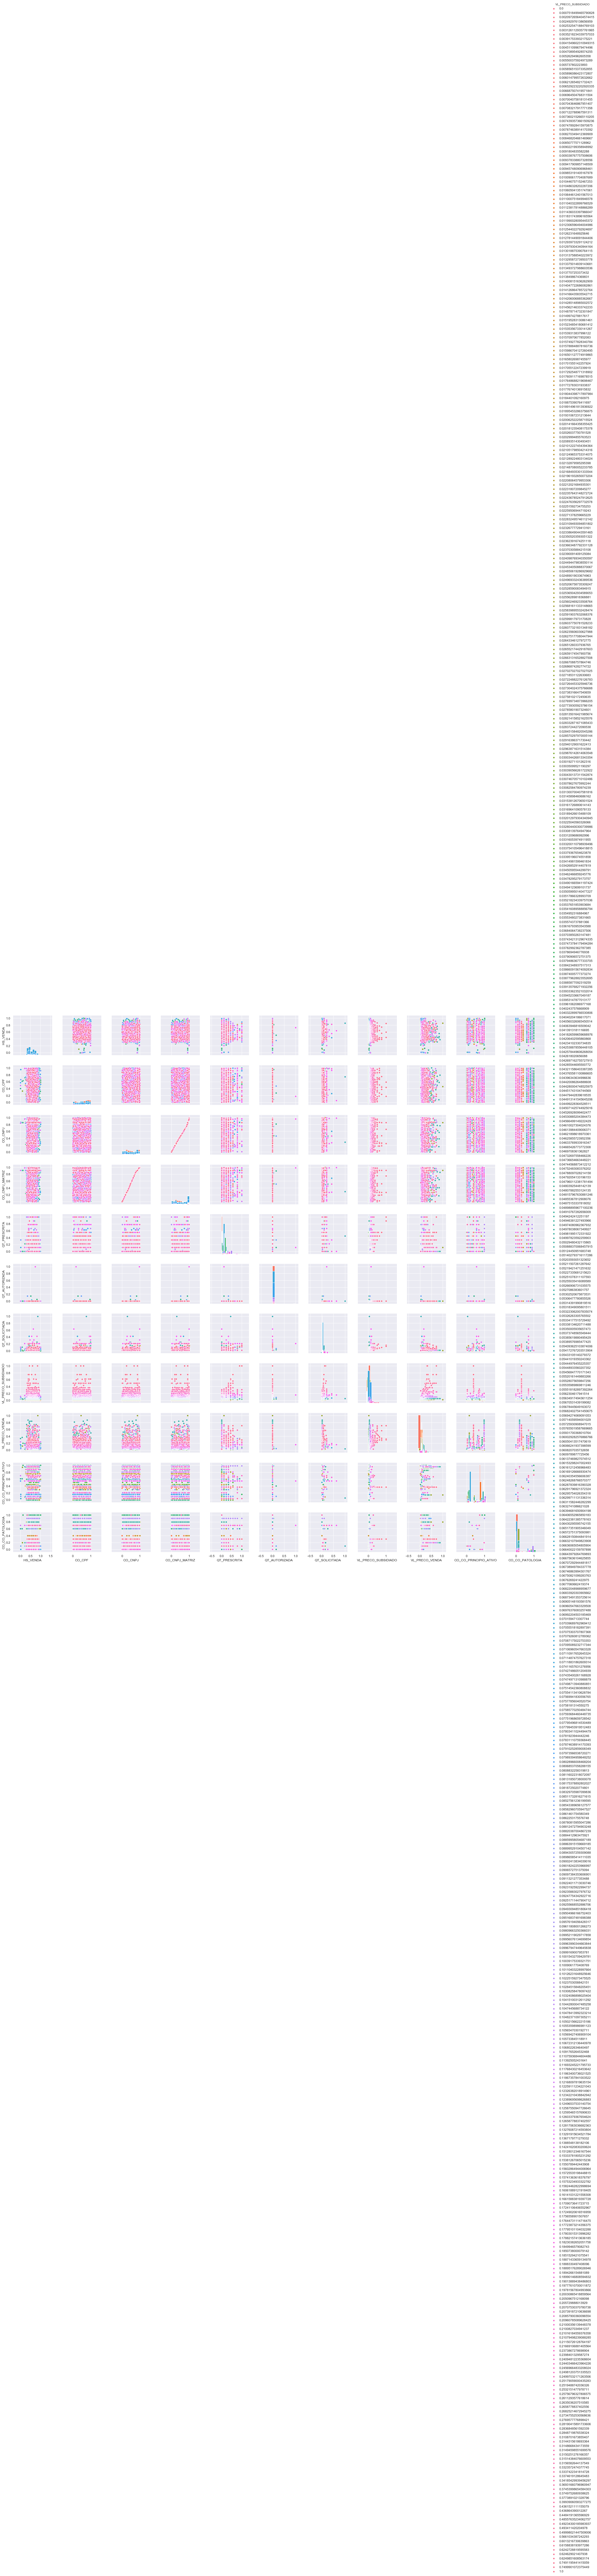

In [16]:
sns.pairplot(plot_data, hue='VL_PRECO_SUBSIDIADO', diag_kind='hist')

In [63]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=2, random_state=0).fit(np_scaled)
_labels = kmeans.predict(np_scaled)

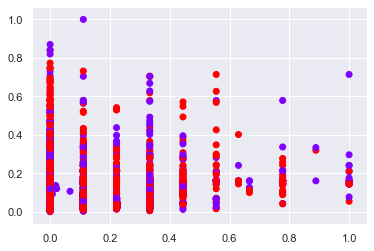

In [19]:
plt.scatter(np_scaled[:,9],np_scaled[:,14], c=_labels, cmap='rainbow')

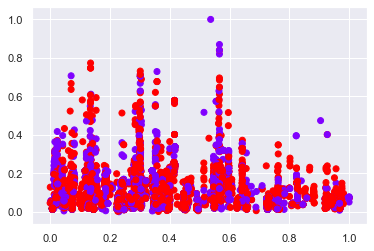

In [20]:
plt.scatter(np_scaled[:,15],np_scaled[:,14], c=_labels, cmap='rainbow')

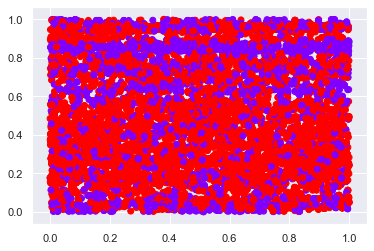

In [21]:
plt.scatter(np_scaled[:,19],np_scaled[:,5], c=_labels, cmap='rainbow')

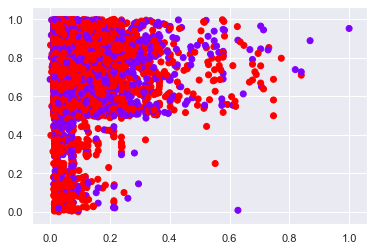

In [22]:
plt.scatter(np_scaled[:,14],np_scaled[:,3], c=_labels, cmap='rainbow')

In [23]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(np_scaled, _labels)

silhouette_avg

0.20391282918990958

In [60]:
labeled_data = pd.read_csv('data/labels_occ.csv', delimiter=';', low_memory=False)
data_norm
# data_norm_ = data_norm.reset_index()


,HS_VENDA,CO_MUNICIPIO_IBGE_FARMACIA,CO_CPF,CO_PRESCRITOR,CO_CRF,CO_CNPJ,CO_CNPJ_CONCENTRADOR,CO_CNPJ_MATRIZ,TP_EMPRESA,QT_PRESCRITA,QT_AUTORIZADA,QT_DEVOLVIDA,QT_SOLICITADA,VL_PRECO_SUBSIDIADO,VL_PRECO_VENDA,CO_CO_CODIGO_BARRA,CO_NO_FABRICANTE,CO_CO_PRINCIPIO_ATIVO,CO_CO_PATOLOGIA,CO_SOLICITACAO
0,0.554037,0.584985,0.181929,0.214485,0.793075,0.805972,1.0,0.894357,0.0,0.000000,0.0,0.072682,0.015352,0.027739,0.096375,0.564731,0.909091,0.947368,0.2,0.753248
1,0.521145,0.493225,0.020871,0.759646,0.318517,0.169757,1.0,0.185730,0.0,0.111111,0.0,0.147870,0.031233,0.075937,0.077084,0.730954,0.845118,0.157895,0.0,0.251592
2,0.444682,0.333586,0.055717,0.719715,0.454749,0.353857,1.0,0.377177,0.0,0.111111,0.0,0.147870,0.031233,0.026077,0.026445,0.725093,0.845118,0.403509,0.0,0.753151
3,0.444682,0.333586,0.055717,0.719715,0.454749,0.353857,1.0,0.377177,0.0,0.111111,0.0,0.147870,0.031233,0.071188,0.072261,0.730954,0.845118,0.157895,0.0,0.753151
4,0.470312,0.482773,0.424132,0.965193,0.526723,0.725106,1.0,0.820783,0.0,0.555556,0.0,0.498747,0.105347,0.079103,0.160678,0.320192,0.387205,0.543860,0.7,0.579795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13754,0.488253,0.483630,0.157082,0.826940,0.283785,0.320559,1.0,0.336535,0.0,0.000000,0.0,0.072682,0.015352,0.022476,0.045655,0.549281,0.909091,0.403509,0.0,0.023602
13755,0.395985,0.286753,0.374286,0.929159,0.141625,0.247597,0.0,0.268311,0.0,0.111111,0.0,0.147870,0.031233,0.042697,0.043324,0.046351,0.720539,0.105263,0.1,0.621269
13756,0.393422,0.485321,0.551004,0.706620,0.303727,0.716690,1.0,0.813007,0.0,0.000000,0.0,0.072682,0.015352,0.018955,0.038502,0.448055,0.124579,0.157895,0.0,0.922831
13757,0.768475,0.096496,0.479024,0.552406,0.441187,0.091404,1.0,0.097966,0.0,0.111111,0.0,0.147870,0.031233,0.075937,0.077084,0.730954,0.845118,0.157895,0.0,0.316525


In [62]:
# data_norm.loc[data_norm['NU_AUTORIZACAO'].isin(labeled_data['NU_AUTORIZACAO'].values)]
data_i = data.reset_index()
merged = pd.merge(labeled_data, data_i, how='inner')
min_max_scaler = MinMaxScaler()
numeric_data = data.select_dtypes(exclude=['object'])
np_scaled = min_max_scaler.fit_transform(numeric_data.values)
data_norm = pd.DataFrame(np_scaled, columns = numeric_data.columns)merged

,NU_AUTORIZACAO,COD_OCORRENCIAS,NU_OCORRENCIAS,CO_UF_FARMACIA,DT_VENDA,HS_VENDA,DT_EMISSAO_RECEITA,CO_MUNICIPIO_IBGE_FARMACIA,SG_UF_CRF,SG_UF_CRM,...,QT_AUTORIZADA,QT_DEVOLVIDA,QT_SOLICITADA,VL_PRECO_SUBSIDIADO,VL_PRECO_VENDA,CO_CO_CODIGO_BARRA,CO_NO_FABRICANTE,CO_CO_PRINCIPIO_ATIVO,CO_CO_PATOLOGIA,CO_SOLICITACAO
0,998468326940063,"13, 8(CPF)",2,MG,2015-05-04,1146,2015-05-04,313510,MG,MG,...,0,30.0,30.0,79.65,26.55,241,16,3,2,498236161
1,998468326940063,"13, 8(CPF)",2,MG,2015-05-04,1146,2015-05-04,313510,MG,MG,...,0,10.0,10.0,26.55,26.55,240,16,13,2,498236161
2,998468583865396,"7 (Procuração), 12, 23, 28, 43 (Sinvastatina ...",5,SP,2017-02-10,1651,2016-11-07,353530,SP,SP,...,0,30.0,30.0,1.80,1.80,484,158,44,1,766485534
3,998468583865396,"7 (Procuração), 12, 23, 28, 43 (Sinvastatina ...",5,SP,2017-02-10,1651,2016-11-07,353530,SP,SP,...,0,30.0,30.0,5.08,5.64,750,61,55,3,766485534
4,998468583865396,"7 (Procuração), 12, 23, 28, 43 (Sinvastatina ...",5,SP,2017-02-10,1651,2016-11-07,353530,SP,SP,...,0,60.0,60.0,18.00,9.00,58,89,10,1,766485534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,998468445910620,"13, 8(CPF)",2,RJ,2016-03-12,1030,2015-11-14,330630,RJ,RJ,...,0,60.0,60.0,18.00,9.00,1088,271,10,1,623000095
90,998468519953277,"13, 8(CPF)",2,RJ,2016-09-10,904,2016-06-15,330330,RJ,RJ,...,0,90.0,90.0,10.80,3.60,1382,252,6,2,700175329
91,998468519953277,"13, 8(CPF)",2,RJ,2016-09-10,904,2016-06-15,330330,RJ,RJ,...,0,60.0,60.0,5.40,2.70,1808,109,1,2,700175329
92,998468519953277,"13, 8(CPF)",2,RJ,2016-09-10,904,2016-06-15,330330,RJ,RJ,...,0,60.0,60.0,18.00,9.00,265,114,10,1,700175329


In [71]:
min_max_scaler = MinMaxScaler()
numeric_merged = merged.select_dtypes(exclude=['object'])
np_merged_scaled = min_max_scaler.fit_transform(numeric_merged.values)
merged_norm = pd.DataFrame(np_merged_scaled, columns = numeric_merged.columns)
merged_norm.drop(['NU_OCORRENCIAS'], axis=1, inplace=True)
merged_norm.set_index('NU_AUTORIZACAO', inplace=True)
merged_labels = kmeans.predict(merged_norm)

unique, counts = np.unique(merged_labels, return_counts=True)
merged_res = dict(zip(unique, counts))
merged_res

{0: 56, 1: 38}

In [72]:
unique, counts = np.unique(_labels, return_counts=True)
data_res = dict(zip(unique, counts))
data_res

{0: 5236, 1: 8523}

In [76]:
group_zero_P = 5236/(5236+8523)
occ_zero_P = 56/(56+38)


print("probability of transactions in group 0: ", group_zero_P)
print("probability of occurrences in group 0: ", occ_zero_P)

probability of transactions in group 0:  0.380550912130242
probability of occurrences in group 0:  0.5957446808510638


# Probabilities

If the probability of a transaction to have incinsistencies(I) is X. Given that the probability of a transaction to be in group 0 (A) is 0.38 and in group 1 (B) is 0.62, and considering that the probability of a incinsistent transaction of being in group 0 (OA) is 0.60 and 0.4 in group 1 (OB). We have that:

```

P(I) = X

P(A) = 0.38
P(B) = 0.62

P(A|I) = 0.6
P(B|I) = 0.4


P(I|A) = P(A|I)*P(I)/P(A)

then

P(I|A) = 0.6*X/0.38

P(I|A) = 1,578*X

```


In [ ]:
print("probability of occurences in transactions of group 0: ", )